In [1]:
using PyPlot
#using Dates
using YahooFinanceAPI

In [2]:
startDate = Date(2000,1,1)
sym = "^GSPC";
data = fetchHistoricalData("$sym", startDate);

In [3]:
#compute the N-day trailing average
lag = 50;
ma = zeros(length(data.adjusted_close)-lag)
for i = lag+1:length(data.adjusted_close)
    sum = 0
    for j = 1:lag
        sum += data.adjusted_close[i-j]
    end
    ma[i-lag] = sum/lag;
end

 in depwarn at deprecated.jl:73
 in float64 at deprecated.jl:50
 in fetchHistoricalData at /home/tyler/src/YahooFinanceAPI.jl/src/yahoo_finance_api/apiCalls.jl:30
 in fetchHistoricalData at /home/tyler/src/YahooFinanceAPI.jl/src/yahoo_finance_api/apiCalls.jl:9
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/tyler/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/tyler/.julia/v0.4/IJulia/src/IJulia.jl:144
 in anonymous at task.jl:447
while loading In[2], in expression starting on line 3
 in depwarn at deprecated.jl:73
 in float64 at deprecated.jl:50
 in fetchHistoricalData at /home/tyler/src/YahooFinanceAPI.jl/src/yahoo_finance_api/apiCalls.jl:30
 in fetchHistoricalData at /home/tyler/src/YahooFinanceAPI.jl/src/yahoo_finance_api/apiCalls.jl:9
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/tyler/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/tyler/.julia/v0.4/IJulia/src/IJulia.jl:144
 in a

# Basic Plotting

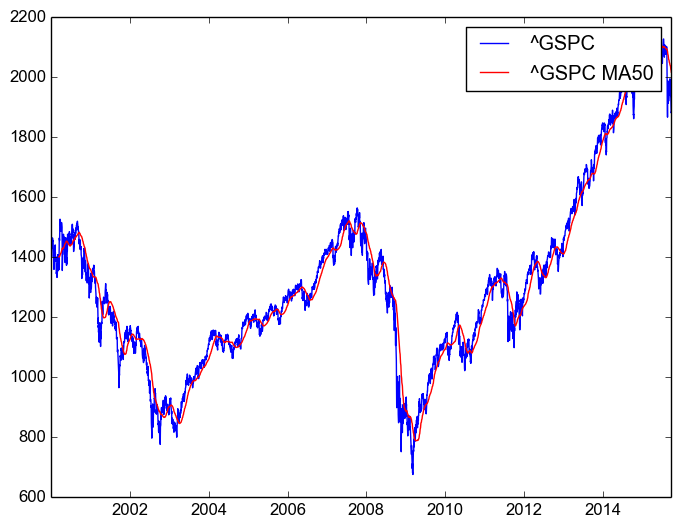

PyObject <matplotlib.legend.Legend object at 0x7ff3bc78cd10>

In [4]:
plot(data.dates,data.adjusted_close,"b-")
plot(data.dates[lag+1:end], ma, "r-")
legend(["$sym", "$sym MA$(lag)"])

# Comparing S&P 500 and VIX

In [ ]:
vixdat = fetchHistoricalData("^VIX",startDate);

In [ ]:
subplot(2,1,1)
plot(data.dates, data.adjusted_close)
legend([sym],"best")
subplot(2,1,2)
plot(vixdat.dates, vixdat.adjusted_close)
legend(["^VIX"],"best")